# 00. Table of contents

 - Importing libraries
 - Importing Dataset
 - Considering security implications - adressing PII Data
 - Creating a regional segmentation of the data
 - Determining difference in spending habits between the different regions (bar chart)
 - Creating an exclusion flag for low-activity customers
 - Excluding low activity customers

# <ins>STEP 1</ins>

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing dataset

In [2]:
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

# <ins>STEP 2</ins>

### Considering security implications - adressing PII Data

In [4]:
# checking columns
ords_prods_cust_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_of_products_purchased', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'First Name',
       'Surname', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'Income'],
      dtype='object')

In [5]:
ords_prods_cust_merged.shape

(32404859, 32)

In [6]:
# dropping columns "first name" and "Surname"
ords_prods_cust_merged = ords_prods_cust_merged.drop(columns= ['First Name','Surname'])

In [7]:
ords_prods_cust_merged.shape

(32404859, 30)

# <ins>STEP 3</ins>

### Creating a regional segmentation of the data

In [8]:
# checking values in the State column
ords_prods_cust_merged['State'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
ords_prods_cust_merged.shape

(32404859, 30)

In [10]:
# creating a new column as a flag for the region of the customer residency
ords_prods_cust_merged.loc[ords_prods_cust_merged['State'].isin (['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']), 'region_flag']= 'Northeast'
ords_prods_cust_merged.loc[ords_prods_cust_merged['State'].isin (['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'region_flag']= 'Midwest'
ords_prods_cust_merged.loc[ords_prods_cust_merged['State'].isin (['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'region_flag']= 'South'
ords_prods_cust_merged.loc[ords_prods_cust_merged['State'].isin (['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'region_flag']= 'West'

In [11]:
#checking if column was created
ords_prods_cust_merged.shape

(32404859, 31)

In [12]:
# checking if new column is not holding any missing values and flagging was successful
ords_prods_cust_merged['region_flag'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region_flag, dtype: int64

### Determining difference in spending habits between the different regions

In [13]:
# creating a pivot of region and spending flags
df_spending_habits= ords_prods_cust_merged.groupby(['region_flag']).spending_flag.value_counts().unstack()

In [14]:
df_spending_habits.sort_index()

spending_flag,High Spender,Low Spender
region_flag,,
Midwest,155932,7441393
Northeast,108180,5614556
South,209481,10582404
West,160271,8132642


Text(0.5, 1.0, 'Regional Spending Habits')

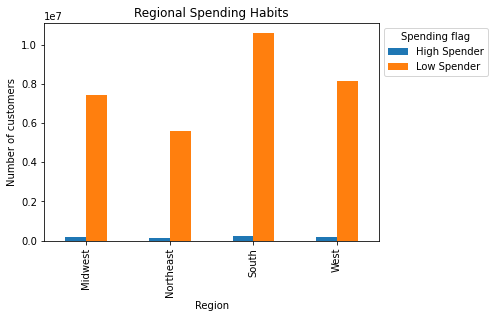

In [15]:
# creating bar chart
ax = df_spending_habits.plot(kind='bar',xlabel='Region', ylabel='Number of customers')
ax.legend(title='Spending flag', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Regional Spending Habits')

Text(0, 0.5, 'Number of High Spenders')

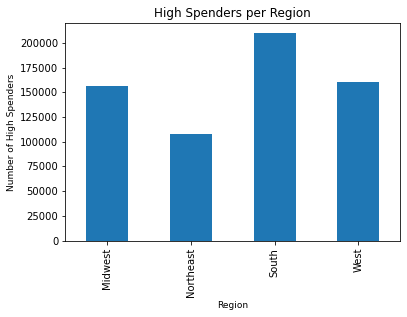

In [16]:
# creating another bar chart
df_spending_habits['High Spender'].plot.bar()
plt.title('High Spenders per Region')
plt.xlabel("Region", fontsize=9)
plt.ylabel("Number of High Spenders",fontsize=9)

# <ins>STEP 4</ins>

### Creating an exclusion flag for low-activity customers (customers with less than 5 orders)

In [17]:
# creating new column with exclusion flag
ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order']<5, 'activity']= 'low activity'
ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order']>=5, 'activity']= 'normal to high activity'

In [18]:
# checking if column creation was succesful
ords_prods_cust_merged.shape

(32404859, 32)

In [19]:
# checking if assigning values to the new column was succesful
ords_prods_cust_merged['activity'].value_counts(dropna= False)

normal to high activity    30964564
low activity                1440295
Name: activity, dtype: int64

###  Excluding low activity customers from the dataset

In [20]:
# creating new df with only high activity customers
ords_prods_cust_merged_high_activity= ords_prods_cust_merged[ords_prods_cust_merged.activity!='low activity']
ords_prods_cust_merged= None

In [21]:
# checking new df if rows with low activity customers have been excluded
ords_prods_cust_merged_high_activity. shape

(30964564, 32)

In [22]:
# saving df with only high activity customers
ords_prods_cust_merged_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merged_high_activity.pkl'))